---
# Data Processing
---

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import OrdinalEncoder

---
### Binary Encoding of RainToday/Tomorrow

In [2]:
df = pd.read_csv('weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
# One Hot Encoding

# Update RainToday column
raintoday = pd.get_dummies(df['RainToday'])  
df['RainToday'] = raintoday['Yes']

# Update RainTomorrow column
raintomorrow = pd.get_dummies(df['RainTomorrow'])  
df['RainTomorrow'] = raintomorrow['Yes']

df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,0,0
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,0,0
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,0,0
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,0,1
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,1,0


---
### Remove NaNs

In [4]:
# Remove columns with over 1/3 NaNs
df.drop(['Evaporation', 'Sunshine', 'Rainfall', 'Cloud9am', 'Cloud3pm', 'Location'], axis = 1, inplace = True) 

df.head()

,Date,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,13.4,22.9,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,2008-12-02,7.4,25.1,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,2008-12-03,12.9,25.7,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,2008-12-04,9.2,28.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,2008-12-05,17.5,32.3,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0


In [5]:
# Drop NaN values
df.dropna(inplace = True) 
df

,Date,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,13.4,22.9,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,2008-12-02,7.4,25.1,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,2008-12-03,12.9,25.7,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,2008-12-04,9.2,28.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,2008-12-05,17.5,32.3,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,3.5,21.8,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,0,0
145455,2017-06-21,2.8,23.4,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,0,0
145456,2017-06-22,3.6,25.3,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,0,0
145457,2017-06-23,5.4,26.9,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,0,0


 ## Encode Remaining Categorical Variables

In [6]:
# Update Date Column

df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
df['day'] = pd.DatetimeIndex(df['Date']).day
df.drop(['Date'], axis = 1, inplace = True) 
df

,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,13.4,22.9,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0,2008,12,1
1,7.4,25.1,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0,2008,12,2
2,12.9,25.7,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0,2008,12,3
3,9.2,28.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0,2008,12,4
4,17.5,32.3,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,3.5,21.8,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,0,0,2017,6,20
145455,2.8,23.4,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,0,0,2017,6,21
145456,3.6,25.3,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,0,0,2017,6,22
145457,5.4,26.9,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,0,0,2017,6,23


In [7]:
df.WindGustDir.value_counts().sort_values(ascending=False)

W      8542
SE     8215
E      7995
SSE    7925
S      7912
N      7896
WSW    7821
SW     7773
SSW    7522
WNW    6982
ENE    6904
NW     6553
ESE    6315
NE     6148
NNE    5604
NNW    5308
Name: WindGustDir, dtype: int64

In [8]:
update_columns = ['WindGustDir', 'WindDir9am', 'WindDir3pm']
def encoding_N(row):
    if 'N' in row[column]:
        return 1
    else:
        return 0
    
def encoding_E(row):
    if 'E' in row[column]:
        return 1
    else:
        return 0
    
def encoding_S(row):
    if 'S' in row[column]:
        return 1
    else:
        return 0
    
def encoding_W(row):
    if 'W' in row[column]:
        return 1
    else:
        return 0

In [9]:
for column in update_columns:
    df[column+'N'] = df.apply(lambda row: encoding_N(row), axis=1)
    df[column+'E'] = df.apply(lambda row: encoding_E(row), axis=1)
    df[column+'S'] = df.apply(lambda row: encoding_S(row), axis=1)
    df[column+'W'] = df.apply(lambda row: encoding_W(row), axis=1)

In [10]:
df.drop(['WindGustDir', 'WindDir9am', 'WindDir3pm'], axis = 1, inplace = True) 

In [11]:
df.head()

,MinTemp,MaxTemp,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,...,WindGustDirS,WindGustDirW,WindDir9amN,WindDir9amE,WindDir9amS,WindDir9amW,WindDir3pmN,WindDir3pmE,WindDir3pmS,WindDir3pmW
0,13.4,22.9,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,...,0,1,0,0,0,1,1,0,0,1
1,7.4,25.1,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,...,0,1,1,0,0,1,0,0,1,1
2,12.9,25.7,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,...,1,1,0,0,0,1,0,0,1,1
3,9.2,28.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,...,0,0,0,1,1,0,0,1,0,0
4,17.5,32.3,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,...,0,1,1,1,0,0,1,0,0,1


---
### Initial Descriptions

In [12]:
df.describe()

,MinTemp,MaxTemp,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,...,WindGustDirS,WindGustDirW,WindDir9amN,WindDir9amE,WindDir9amS,WindDir9amW,WindDir3pmN,WindDir3pmE,WindDir3pmS,WindDir3pmW
count,115415.000000,115415.000000,115415.000000,115415.000000,115415.000000,115415.000000,115415.000000,115415.000000,115415.000000,115415.000000,...,115415.000000,115415.000000,115415.000000,115415.000000,115415.000000,115415.000000,115415.000000,115415.000000,115415.000000,115415.000000
mean,12.672407,23.644513,40.828081,15.216688,19.516371,67.459732,50.740320,1017.422445,1015.049384,17.459860,...,0.463397,0.437560,0.437473,0.447515,0.433505,0.398588,0.398622,0.425309,0.471706,0.438340
std,6.238970,6.971647,13.338630,8.362088,8.586030,18.875427,20.750281,7.033366,6.958978,6.341598,...,0.498661,0.496088,0.496077,0.497240,0.495561,0.489610,0.489617,0.494392,0.499201,0.496186
min,-8.200000,2.600000,7.000000,2.000000,2.000000,0.000000,0.000000,980.500000,977.100000,-3.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.100000,18.300000,31.000000,9.000000,13.000000,56.000000,36.000000,1012.800000,1010.300000,12.700000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.400000,23.100000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.400000,1015.000000,17.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,17.200000,28.700000,48.000000,20.000000,24.000000,81.000000,65.000000,1022.100000,1019.700000,22.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,33.900000,48.100000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,40.200000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


---
### Correlation Matrix & removing high Correlations

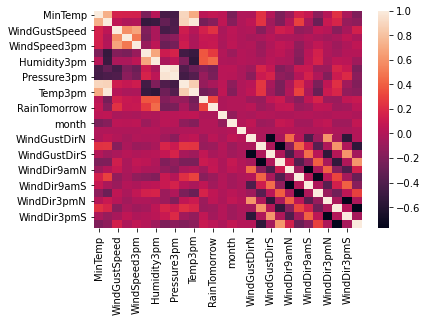

In [13]:
# Correlation Matrix attributes with other attributes

corr_map = sns.heatmap(df.corr())
corr_map

In [14]:
correlate = df.corr()
correlate

,MinTemp,MaxTemp,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,...,WindGustDirS,WindGustDirW,WindDir9amN,WindDir9amE,WindDir9amS,WindDir9amW,WindDir3pmN,WindDir3pmE,WindDir3pmS,WindDir3pmW
MinTemp,1.000000,0.728610,0.159282,0.150052,0.145654,-0.217067,0.026907,-0.433600,-0.448056,0.898502,...,0.011241,-0.208689,-0.082341,0.150988,0.090011,-0.145901,0.020486,0.232103,-0.019005,-0.197892
MaxTemp,0.728610,1.000000,0.056850,-0.005989,0.013626,-0.515588,-0.497169,-0.312804,-0.411641,0.884949,...,-0.064723,-0.203830,0.017123,0.294265,-0.025456,-0.283775,0.101639,0.175630,-0.102426,-0.138989
WindGustSpeed,0.159282,0.056850,1.000000,0.590132,0.678569,-0.183934,-0.021263,-0.446087,-0.400743,0.124632,...,-0.021431,0.140730,0.094629,-0.125451,-0.086797,0.062170,0.024387,-0.157909,-0.033484,0.144229
WindSpeed9am,0.150052,-0.005989,0.590132,1.000000,0.498255,-0.222205,-0.018744,-0.202463,-0.151562,0.089087,...,0.028567,-0.021348,-0.021269,-0.033222,0.010572,-0.020491,-0.064041,-0.023885,0.063355,-0.014892
WindSpeed3pm,0.145654,0.013626,0.678569,0.498255,1.000000,-0.093797,0.052981,-0.285172,-0.245085,0.126241,...,0.001690,0.071292,0.034362,-0.133435,-0.011101,0.069909,-0.001086,-0.074840,-0.004145,0.064907
Humidity9am,-0.217067,-0.515588,-0.183934,-0.222205,-0.093797,1.000000,0.683476,0.116009,0.168641,-0.463127,...,0.020966,0.052706,-0.016518,-0.161222,0.035753,0.152589,-0.007751,-0.048454,0.012893,0.023539
Humidity3pm,0.026907,-0.497169,-0.021263,-0.018744,0.052981,0.683476,1.000000,-0.034903,0.046907,-0.201721,...,0.032729,0.003379,-0.020678,-0.189749,0.053032,0.169383,-0.029921,0.052088,0.044492,-0.071357
Pressure9am,-0.433600,-0.312804,-0.446087,-0.202463,-0.285172,0.116009,-0.034903,1.000000,0.960230,-0.400322,...,0.085080,-0.196421,-0.115900,0.098982,0.106636,-0.080357,-0.082790,0.172866,0.105549,-0.210663
Pressure3pm,-0.448056,-0.411641,-0.400743,-0.151562,-0.245085,0.168641,0.046907,0.960230,1.000000,-0.453182,...,0.164242,-0.133684,-0.170653,0.023264,0.160200,0.000609,-0.187342,0.118540,0.201575,-0.151664
Temp9am,0.898502,0.884949,0.124632,0.089087,0.126241,-0.463127,-0.201721,-0.400322,-0.453182,1.000000,...,-0.031809,-0.216874,-0.023626,0.220149,0.029591,-0.213503,0.060700,0.231890,-0.063271,-0.185623


In [15]:
correlated_features = set()

for i in range(len(correlate.columns)):
    for j in range(i):
        if abs(correlate.iloc[i, j]) > 0.85:
            colname = correlate.columns[i]
            correlated_features.add(colname)
            
df.drop(labels=correlated_features, axis=1, inplace=True)

In [16]:
df.head()

,MinTemp,MaxTemp,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,RainToday,RainTomorrow,...,WindGustDirS,WindGustDirW,WindDir9amN,WindDir9amE,WindDir9amS,WindDir9amW,WindDir3pmN,WindDir3pmE,WindDir3pmS,WindDir3pmW
0,13.4,22.9,44.0,20.0,24.0,71.0,22.0,1007.7,0,0,...,0,1,0,0,0,1,1,0,0,1
1,7.4,25.1,44.0,4.0,22.0,44.0,25.0,1010.6,0,0,...,0,1,1,0,0,1,0,0,1,1
2,12.9,25.7,46.0,19.0,26.0,38.0,30.0,1007.6,0,0,...,1,1,0,0,0,1,0,0,1,1
3,9.2,28.0,24.0,11.0,9.0,45.0,16.0,1017.6,0,0,...,0,0,0,1,1,0,0,1,0,0
4,17.5,32.3,41.0,7.0,20.0,82.0,33.0,1010.8,0,0,...,0,1,1,1,0,0,1,0,0,1


---
### Undersampling the data

Text(0.5, 1.0, 'Dataset Balance')

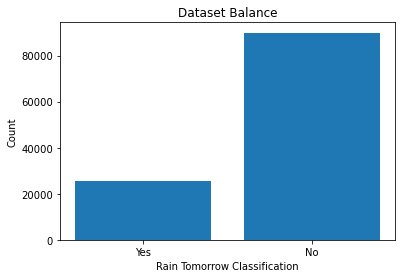

In [17]:
# Barplot to display original balance of data

sum_yes = df['RainTomorrow'].sum()
sum_no = len(df) - sum_yes

x_labels = ['Yes', 'No']
y_labels = [sum_yes, sum_no]

plt.bar(x_labels, y_labels)
plt.xlabel('Rain Tomorrow Classification')
plt.ylabel('Count')
plt.title('Dataset Balance')

In [18]:
# Undersampling
X = df.drop("RainTomorrow", axis=1)
y = df["RainTomorrow"]
RUS = RandomUnderSampler(random_state=42)
X_und, y_und = RUS.fit_sample(X, y)

Text(0.5, 1.0, 'Dataset Balance')

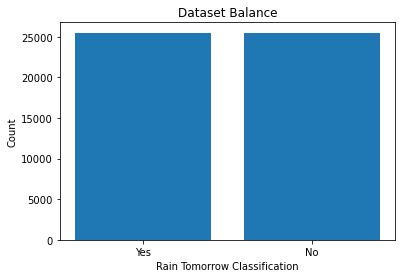

In [19]:
# Barplot of data after undersampling

sum_yes = y_und.sum()
sum_no = len(y_und) - sum_yes

x_labels = ['Yes', 'No']
y_labels = [sum_yes, sum_no]

plt.bar(x_labels, y_labels)
plt.xlabel('Rain Tomorrow Classification')
plt.ylabel('Count')
plt.title('Dataset Balance')

---
### Split into testing and training data

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X_und, y_und, test_size=0.25, random_state=42)

In [21]:
#x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

---
# Machine Learning Models
---

## Logistic Regression Implementation

In [22]:
# Add bias column
def add_const(dataframe):
    n, k = dataframe.shape
    ones = np.ones((n, 1))
    return np.concatenate([ones, dataframe], axis = 1)

def prediction(values):
    if values >= 0.5:
        return 1
    else:
        return 0

In [23]:
class GDLogReg:
    def __init__(self):
        self.theta = None

    def predict(self, X):
        X = add_const(X)
        predicted_values = X @ self.theta
        
        return[prediction(x) for x in predicted_values]

    def fit(self, X, y, l_rate=.01, epochs=100, epsilon=.0001, log=False):

        # Add bias column
        X = add_const(X)
        
        n, d = X.shape

        # 1. initialize theta at random
        self.theta = np.zeros(d)

        # 2. repeat until stopping conditions
        for epoch in range(epochs):
            theta_old = self.theta
            
            # Apply sigmoid function
            h_theta = (1/ (1 + np.exp(-(X @ self.theta))))
            residuals = h_theta - y 
            gradient = residuals @ X

            # 3. Update theta
            self.theta = theta_old - l_rate * gradient
            difference = np.linalg.norm(self.theta - theta_old)

            if log:
                print(f'iter: {epoch}\tdif: {difference}')

            # Check for convergence
            if epsilon > difference:
                break 

        return self

lr_gd = GDLogReg()
lr_gd.fit(x_train, y_train, l_rate=.01, epsilon=1e-6, log = False)
pd.Series(lr_gd.theta, index = ['constant'] + list(x_train))

<ipython-input-23-d93e52962ecf>:26: RuntimeWarning: overflow encountered in exp
  h_theta = (1/ (1 + np.exp(-(X @ self.theta))))


constant            140.7950
MinTemp           13264.2810
MaxTemp          -23030.3070
WindGustSpeed     76666.5300
WindSpeed9am      18793.2050
WindSpeed3pm      20391.6950
Humidity9am      129631.7050
Humidity3pm      223517.8200
Pressure9am      104485.9265
RainToday          3003.7700
year             282751.3950
month               941.0800
day                3389.3000
WindGustDirN        611.8350
WindGustDirE       -923.7700
WindGustDirS       -425.2600
WindGustDirW        870.4600
WindDir9amN        1029.8750
WindDir9amE        -908.8450
WindDir9amS        -711.8200
WindDir9amW         699.1350
WindDir3pmN         755.1350
WindDir3pmE        -731.8600
WindDir3pmS        -609.8200
WindDir3pmW         695.2400
dtype: float64

In [24]:
def get_indexed(dictionary):
    
    return pd.DataFrame(dictionary).set_index(['l_rate', 'epochs'])

    l_rates, epochs = [.01, .1, .5], [10, 50, 100]
    cross_entropy, metrics = [], []

    for l_rate in l_rates:
        for epoc in epochs:
            lr_gd = GDLogReg().fit(x_train, y_train, l_rate, epoc)

            train_pred = lr_gd.predict(x_train)
            test_pred = lr_gd.predict(x_test)

        
        # Cross entropy loss objective
        params_cross_entropy = {
            'l_rate': l_rate,
            'epochs': epoc
        }
        
        params_cross_entropy.update(
                                    {
                                        'cross_entropy_train': log_loss(y_train, train_pred),
                                        'cross_entropy_test': log_loss(y_test, test_pred)
                                    })
        cross_entropy.append(params_cross_entropy)
        
        # Metrics for 100 iterations
        params_metrics = {
            'l_rate': l_rate,
            'epochs': epoc
        }
        
        if epoc == 100:
            
            params_metrics.update(
                                    {
                                     'accuracy_train': accuracy_score(y_train, train_pred),
                                     'accuracy_test': accuracy_score(y_test, test_pred),
                                     'precision_train': precision_score(y_train, train_pred),
                                     'precision_test': precision_score(y_test, test_pred),
                                     'recall_train': recall_score(y_train, train_pred),
                                     'recall_test': recall_score(y_test, test_pred),
                                     'f1_train': f1_score(y_train, train_pred),
                                     'f1_test': f1_score(y_test, test_pred)
                                    })
            metrics.append(params_metrics)

In [25]:
get_indexed(cross_entropy)

NameError: name 'cross_entropy' is not defined

In [ ]:
get_indexed(metrics)

## Naive Bayes Implementation

In [26]:
x_train_total = pd.concat([x_train, y_train], axis=1)
x_train_total.head()

,MinTemp,MaxTemp,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,RainToday,year,...,WindGustDirW,WindDir9amN,WindDir9amE,WindDir9amS,WindDir9amW,WindDir3pmN,WindDir3pmE,WindDir3pmS,WindDir3pmW,RainTomorrow
22845,7.2,13.5,46.0,17.0,31.0,76.0,61.0,1021.8,1,2015,...,1,0,0,0,1,0,0,1,1,0
42446,21.2,28.8,48.0,19.0,24.0,78.0,97.0,1009.6,0,2014,...,1,1,1,0,0,0,0,0,1,1
5989,16.8,28.0,39.0,19.0,22.0,74.0,60.0,1012.4,0,2015,...,0,0,0,1,1,0,1,1,0,0
39347,12.5,24.4,50.0,6.0,7.0,78.0,43.0,1014.6,0,2014,...,0,0,0,1,1,0,1,1,0,1
31998,6.0,17.2,33.0,9.0,22.0,95.0,55.0,1029.4,1,2009,...,0,1,0,0,1,0,1,1,0,1


In [41]:
class NaiveBayes():

    def __init__(self, train_data=x_train_total, y="RainTomorrow"):
        self.data = train_data
        self.length = len(self.data)
        self.cols = list(train_data.columns.values)
        self.y=y
        self.cols.remove(self.y)
        self.probs = {}
        self.conds = {}
        self.train()
        return

    def train(self):
        # make probs for e and p!
        self.probs = self.data.groupby(self.y).size().div(self.length)

        # make a dict for each classification
        for classification in self.data[self.y].unique():
            self.conds[classification] = {}

        # get conditional probabilities for the rest of the data
        for mushroom_quality in self.cols: # https://stackoverflow.com/questions/37818063/how-to-calculate-conditional-probability-of-values-in-dataframe-pandas-python

            class_probs = self.data.groupby(mushroom_quality).size().div(self.length)
            conditionals = self.data.groupby([self.y, mushroom_quality]).size().div(self.length).div(class_probs, axis=0, level=mushroom_quality)

            for classification in self.data[self.y].unique():
                self.conds[classification][mushroom_quality] = {}
                for quality_type in conditionals[classification].keys():
                    self.conds[classification][mushroom_quality][quality_type] = conditionals[classification][quality_type]

        return
  
    def predict(self, input=x_test):
        output = []
        for index, row in input.iterrows():
            guess = {}
            for edability in self.data[self.y].unique():
                guess[edability] = 1
                for mushroom_quality in self.cols:
                    try:
                        quality_in_class = self.conds[edability][mushroom_quality][row[mushroom_quality]]
                    except:
                        quality_in_class = (1 / self.length + len(self.cols))
          
                    guess[edability] += np.log(quality_in_class)
                guess[edability] += np.log(self.probs[edability])
        output.append(max(guess, key=guess.get))
        return output

SyntaxError: 'return' outside function (<ipython-input-41-51fb28797198>, line 50)

In [39]:
NB = NaiveBayes()

In [40]:
guesses = NB.predict()
print(guesses[1:8])
print(list(y_test[1:8]))

AttributeError: 'NaiveBayes' object has no attribute 'predict'

In [33]:
def TF(y_actu, y_pred):
    TP = np.sum(np.logical_and(y_pred == 1, y_actu == 1))
    TN = np.sum(np.logical_and(y_pred == 0, y_actu == 0))
    FP = np.sum(np.logical_and(y_pred == 1, y_actu == 0))
    FN = np.sum(np.logical_and(y_pred == 0, y_actu == 1))
    return TP, FP, TN, FN

In [30]:
TP, FP, TN, FN = TF(y_test, np.array(guesses))
TP, FP, TN, FN

NameError: name 'TF' is not defined

In [31]:
acc = (TP + TN) / (TP + TN + FP + FN)
pre = TP / (TP + FP)
re = TP / (FN + TP)
f1 = (2 * (pre * re)) / (pre + re)
NB_scoring = {"NB hand-coded":{"Accuracy":acc, "Precision":pre,"Recall":re,"F1":f1}}

NameError: name 'TP' is not defined

In [32]:
pd.DataFrame(NB_scoring)

NameError: name 'NB_scoring' is not defined